In [1]:
# Reads in Bird's plate boundaries and combines into trench segments
# that match the slab 2.0 slab segments
# Creates a global plot to show the combined trench files with the slab2.0 data
# These trench files are used (separately) to create trench-perpendicular profiles
# and extract data along the profiles.

import json
import numpy as np
import pygmt


In [2]:
# Read in Bird's plate boundary data from a JSON format file
#dir = '/Users/billen/Box-Sync/Mybin/Data-Sets/tectonicplates-master/GeoJSON/'
dir ='./'
boundaries_json_file = dir + 'PB2002_boundaries.json'

file_object = open(boundaries_json_file,'r')
data = json.load(file_object)

In [3]:
# Directory where Slab2.0 data is kept
#slab2dir ="/Users/billen/Box-Sync/Mybin/Data-Sets/Slab2Distribute_Mar2018/"\
slab2dir ='./Slab2GRDFiles/'
# Define color-map file and create (using Fabio's scientific color maps)
cptfile ="slabdepth.cpt"
pygmt.makecpt(cmap="buda",series=(-700,0,100),output=cptfile)

In [4]:
# Birds Plate Boundaries as a Dictionary
# Not used here, but very useful for remembering which abbreviation goes with which region
plates = {
    'AF':'Africa','AM':'Amur','AN':'Antarctica','AP':'Altiplano',
    'AR':'Arabia','AS':'Aegean Sea','AT':'Anatolia', 'AU':'Australia',
    'BH':'Birds Head','BR':'Balmoral Reef','BS':'Banda Sea','BU':'Burma',
    'CA':'Caribbean','CL':'Caroline','CO':'Cocos','CR':'Conway Reef',
    'EA':'Easter','EU':'Eurasia','FT':'Futuna','GP':'Galapagos',
    'IN':'India','JF':'Juan de Fuca','JZ':'Juan Fernandez','KE':'Kermadec',
    'MA':'Mariana','MN':'Manus','MO':'Maoke','MS':'Molucca Sea','NA':'North America',
    'NB':'North Bismarck','ND':'North Andes','NH':'New Hebrides','NI':'Niuafo ou',
    'NZ':'Nazca','OK':'Okhotsk','ON':'Okinawa','PA':'Pacific','PM':'Panama',
    'PS':'Philippine Sea','RI':'Rivera','SA':'South America','SB':'South Bismarck',
    'SC':'Scotia','SL':'Shetland','SO':'Somalia','SS':'Solomon Sea',
    'SU':'Sunda','SW':'Sandwich','TI':'Timor','TO':'Tonga','WL':'Woodlark','YA':'Yangtze'
}

In [5]:
# Slab 2.0 Slabs
loc = ['alu','cal','cam','car','cas','cot','hal','hel','him','hin','izu',
	'ker','kur','mak','man','mue','pam',
    'phi','png','puy','ryu','sam','sco','sol','sul','sum','van'];

# For each slab, list the unique subduction plate boundaries from Bird's data set.
# Sort = 1, will sort combined coordinates by longitude
# Sort = 2, will sort combined coordinates by latitude
# Dip-Dir - indicates dominate dip direction of the slab: North, South, West or East
# (used for choosing profile direction and dip direction in WorldBuiler file)
slab2bird = {
    'alu' : {'Slab':'Aleutians','Name': ['NA/PA'], 'Sort': 1, 'Dip-Dir' : 'North', 'Flip': 0}, # Alaska, Central and West Aleutians
    'cal' : {'Slab':'Calabria','Name': ['EU/AF' ], 'Sort': 1, 'Dip-Dir' : 'North', 'Flip': 0}, # Calabria, 
    'cam' : {'Slab':'Central America','Name': ['NA/RI',' CO\\NA', 'CA/CO','CO\\PM'], 'Sort': 2, 'Dip-Dir' : 'East', 'Flip': 0}, # Central America, Mexico, El Salvador
    'car' : {'Slab':'Caribbean','Name': ['CA/SA'], 'Sort': 2, 'Dip-Dir' : 'West', 'Flip': 0}, # Caribbean, Lesser Antilles, Puerto Rico
    'cas' : {'Slab':'Cascadia','Name': ['JF\\NA'], 'Sort': 2, 'Dip-Dir' : 'East', 'Flip': 0}, # Cascadia
    'cot' : {'Slab':'Cotabato','Name': ['' ], 'Sort': 0, 'Dip-Dir' : 'East', 'Flip': 0}, # Cotabato, near philippines
    'hal' : {'Slab':'Halmahera','Name': ['' ],  'Sort': 0, 'Dip-Dir' : 'East', 'Flip': 0}, # Halmahera
    'hel' : {'Slab':'Helleni','Name': ['AS/AF','AT/AF'], 'Sort': 1, 'Dip-Dir' : 'North', 'Flip': 0}, # Hellenic
    'him' : {'Slab':'Himalaya','Name': ['' ],  'Sort': 0, 'Dip-Dir' : 'North', 'Flip': 0}, # Himalaya
    'hin' : {'Slab':'Hindu Kush','Name': ['' ],  'Sort': 0, 'Dip-Dir' : 'North', 'Flip': 0}, # Hindu Kush
    'izu' : {'Slab':'Izu-Bonin Marianas','Name': ['PS/PA','MA/PA'],  'Sort': 2, 'Dip-Dir' : 'West', 'Flip': 0},# Izu-Bonin, Izu, N and S. Marianas
    'ker' : {'Slab':'Tonga-Kermadec','Name': ['KE/PA','TO/PA'],  'Sort': 2, 'Dip-Dir' : 'West', 'Flip': 0},# Tonga, Kermadec, New Zealand
    'kur' : {'Slab':'Kuriles-Japan','Name': ['OK/PA','PA\\OK'], 'Sort': 2, 'Dip-Dir' : 'West', 'Flip': 0}, # Kuriles, Kamchatka and Japan
    'mak' : {'Slab':'Makran','Name': ['' ],  'Sort': 0, 'Dip-Dir' : 'North', 'Flip': 0},# Makran
    'man' : {'Slab':'Manilla','Name': ['PS/SU'], 'Sort': 2, 'Dip-Dir' : 'East', 'Flip': 0}, # Manilla
    'mue' : {'Slab':'Muertos','Name': ['' ], 'Sort': 0, 'Dip-Dir' : 'East', 'Flip': 0}, # Muertos
    'pam' : {'Slab':'Pamir','Name': ['' ], 'Sort': 0, 'Dip-Dir' : 'North', 'Flip': 0}, # Pamir
    'phi' : {'Slab':'Philippines','Name': ['PS\\SU'], 'Sort': 2, 'Dip-Dir' : 'West', 'Flip': 0}, # North, Central, South Philippines
    'png' : {'Slab':'New Guinea','Name': ['CL\\WL', 'NB\\WL'], 'Sort': 1, 'Dip-Dir' : 'South', 'Flip': 0}, # New Guinea
    'puy' : {'Slab':'Puysegur','Name': ['PA/AU', 'AU\\PA'], 'Sort': 2, 'Dip-Dir' : 'East', 'Flip': 0}, # Puysegur
    'ryu' : {'Slab':'Ryuku Nankai','Name': ['ON/PS', 'AM/PS'], 'Sort': 2, 'Dip-Dir' : 'West', 'Flip': 0}, # Central and South Ryuku, Nankai
    'sam' : {'Slab':'South America','Name': ['AN\\SA','NZ\\SA','NZ\\AP','NZ\\ND','ND/NZ'],  'Sort': 2, 'Dip-Dir' : 'East', 'Flip': 0},# Colombia, Ecuador-Peru, Peru, Chile
    'sco' : {'Slab':'Scotia','Name': ['SW/SA' ],  'Sort': 2, 'Dip-Dir' : 'West', 'Flip': 0},# Scotia
    'sol' : {'Slab':'Solomons','Name': ['SB/SS','NB/SS','PA/SS', 'PA/WL', 'PA/AU'], 'Sort': 1, 'Dip-Dir' : 'North', 'Flip': 0}, # Solomons, Bougainville, New Britain
    'sul' : {'Slab':'Sulawesi','Name': ['MS/SU'], 'Sort': 1, 'Dip-Dir' : 'South', 'Flip': 0}, # Sulawesi
    'sum' : {'Slab':'Java Sumatra','Name': ['SU/AU','BU/AU','BU/IN','IN\\BU'], 'Sort': 2, 'Dip-Dir' : 'North', 'Flip': 0}, # Sumatra, Andaman Islands, Java, Timo, Maluku
    'van' : {'Slab':'Vanuatu','Name': ['NH/AU'],  'Sort': 1, 'Dip-Dir' : 'East', 'Flip': 0}, # Vanuatu    
}

In [6]:
# For plot read in topography for basemap and choose fonts
topogrid = pygmt.datasets.load_earth_relief(resolution="10m",registration="gridline")
pygmt.config(FONT='Times-Roman')
pygmt.config(FONT_LABEL='Times-Roman,12p')

In [7]:
# Basic global map in gmt
fig = pygmt.Figure()
fig.basemap(region="d", projection="W180/30c", frame=True)
fig.grdimage(grid=topogrid,cmap="gray")
fig.coast(shorelines="1/0.5p,black",resolution="i")

# Plot the Slab 2.0 slabs that we have plate boundaries for:
for i in range(len(slab2bird)):
    if slab2bird[loc[i]]['Name']!=['']:
        grdfile = slab2dir + loc[i] + '_slab2_dep.grd'
        fig.grdimage(grid=grdfile,nan_transparent=True,cmap=cptfile)

# Add on the non-subduction plate boundaries
for i in range(len(data["features"])):
    if 'subduction' not in data["features"][i]["properties"].values():
        coords = np.array(data["features"][i]["geometry"]["coordinates"])
        fig.plot(x=coords[:,0],y=coords[:,1], pen="1p,white")  
print('Keep going...')

Keep going...


0 alu_trench_coords.xy ['NA/PA']
1 cal_trench_coords.xy ['EU/AF']
2 cam_trench_coords.xy ['NA/RI', ' CO\\NA', 'CA/CO', 'CO\\PM']
3 car_trench_coords.xy ['CA/SA']
4 cas_trench_coords.xy ['JF\\NA']
5 cot_trench_coords.xy ['']
6 hal_trench_coords.xy ['']
7 hel_trench_coords.xy ['AS/AF', 'AT/AF']
8 him_trench_coords.xy ['']
9 hin_trench_coords.xy ['']
10 izu_trench_coords.xy ['PS/PA', 'MA/PA']
11 ker_trench_coords.xy ['KE/PA', 'TO/PA']
12 kur_trench_coords.xy ['OK/PA', 'PA\\OK']
13 mak_trench_coords.xy ['']
14 man_trench_coords.xy ['PS/SU']
15 mue_trench_coords.xy ['']
16 pam_trench_coords.xy ['']
17 phi_trench_coords.xy ['PS\\SU']
18 png_trench_coords.xy ['CL\\WL', 'NB\\WL']
19 puy_trench_coords.xy ['PA/AU', 'AU\\PA']
20 ryu_trench_coords.xy ['ON/PS', 'AM/PS']
21 sam_trench_coords.xy ['AN\\SA', 'NZ\\SA', 'NZ\\AP', 'NZ\\ND', 'ND/NZ']
22 sco_trench_coords.xy ['SW/SA']
23 sol_trench_coords.xy ['SB/SS', 'NB/SS', 'PA/SS', 'PA/WL', 'PA/AU']
24 sul_trench_coords.xy ['MS/SU']
25 sum_trench_coords

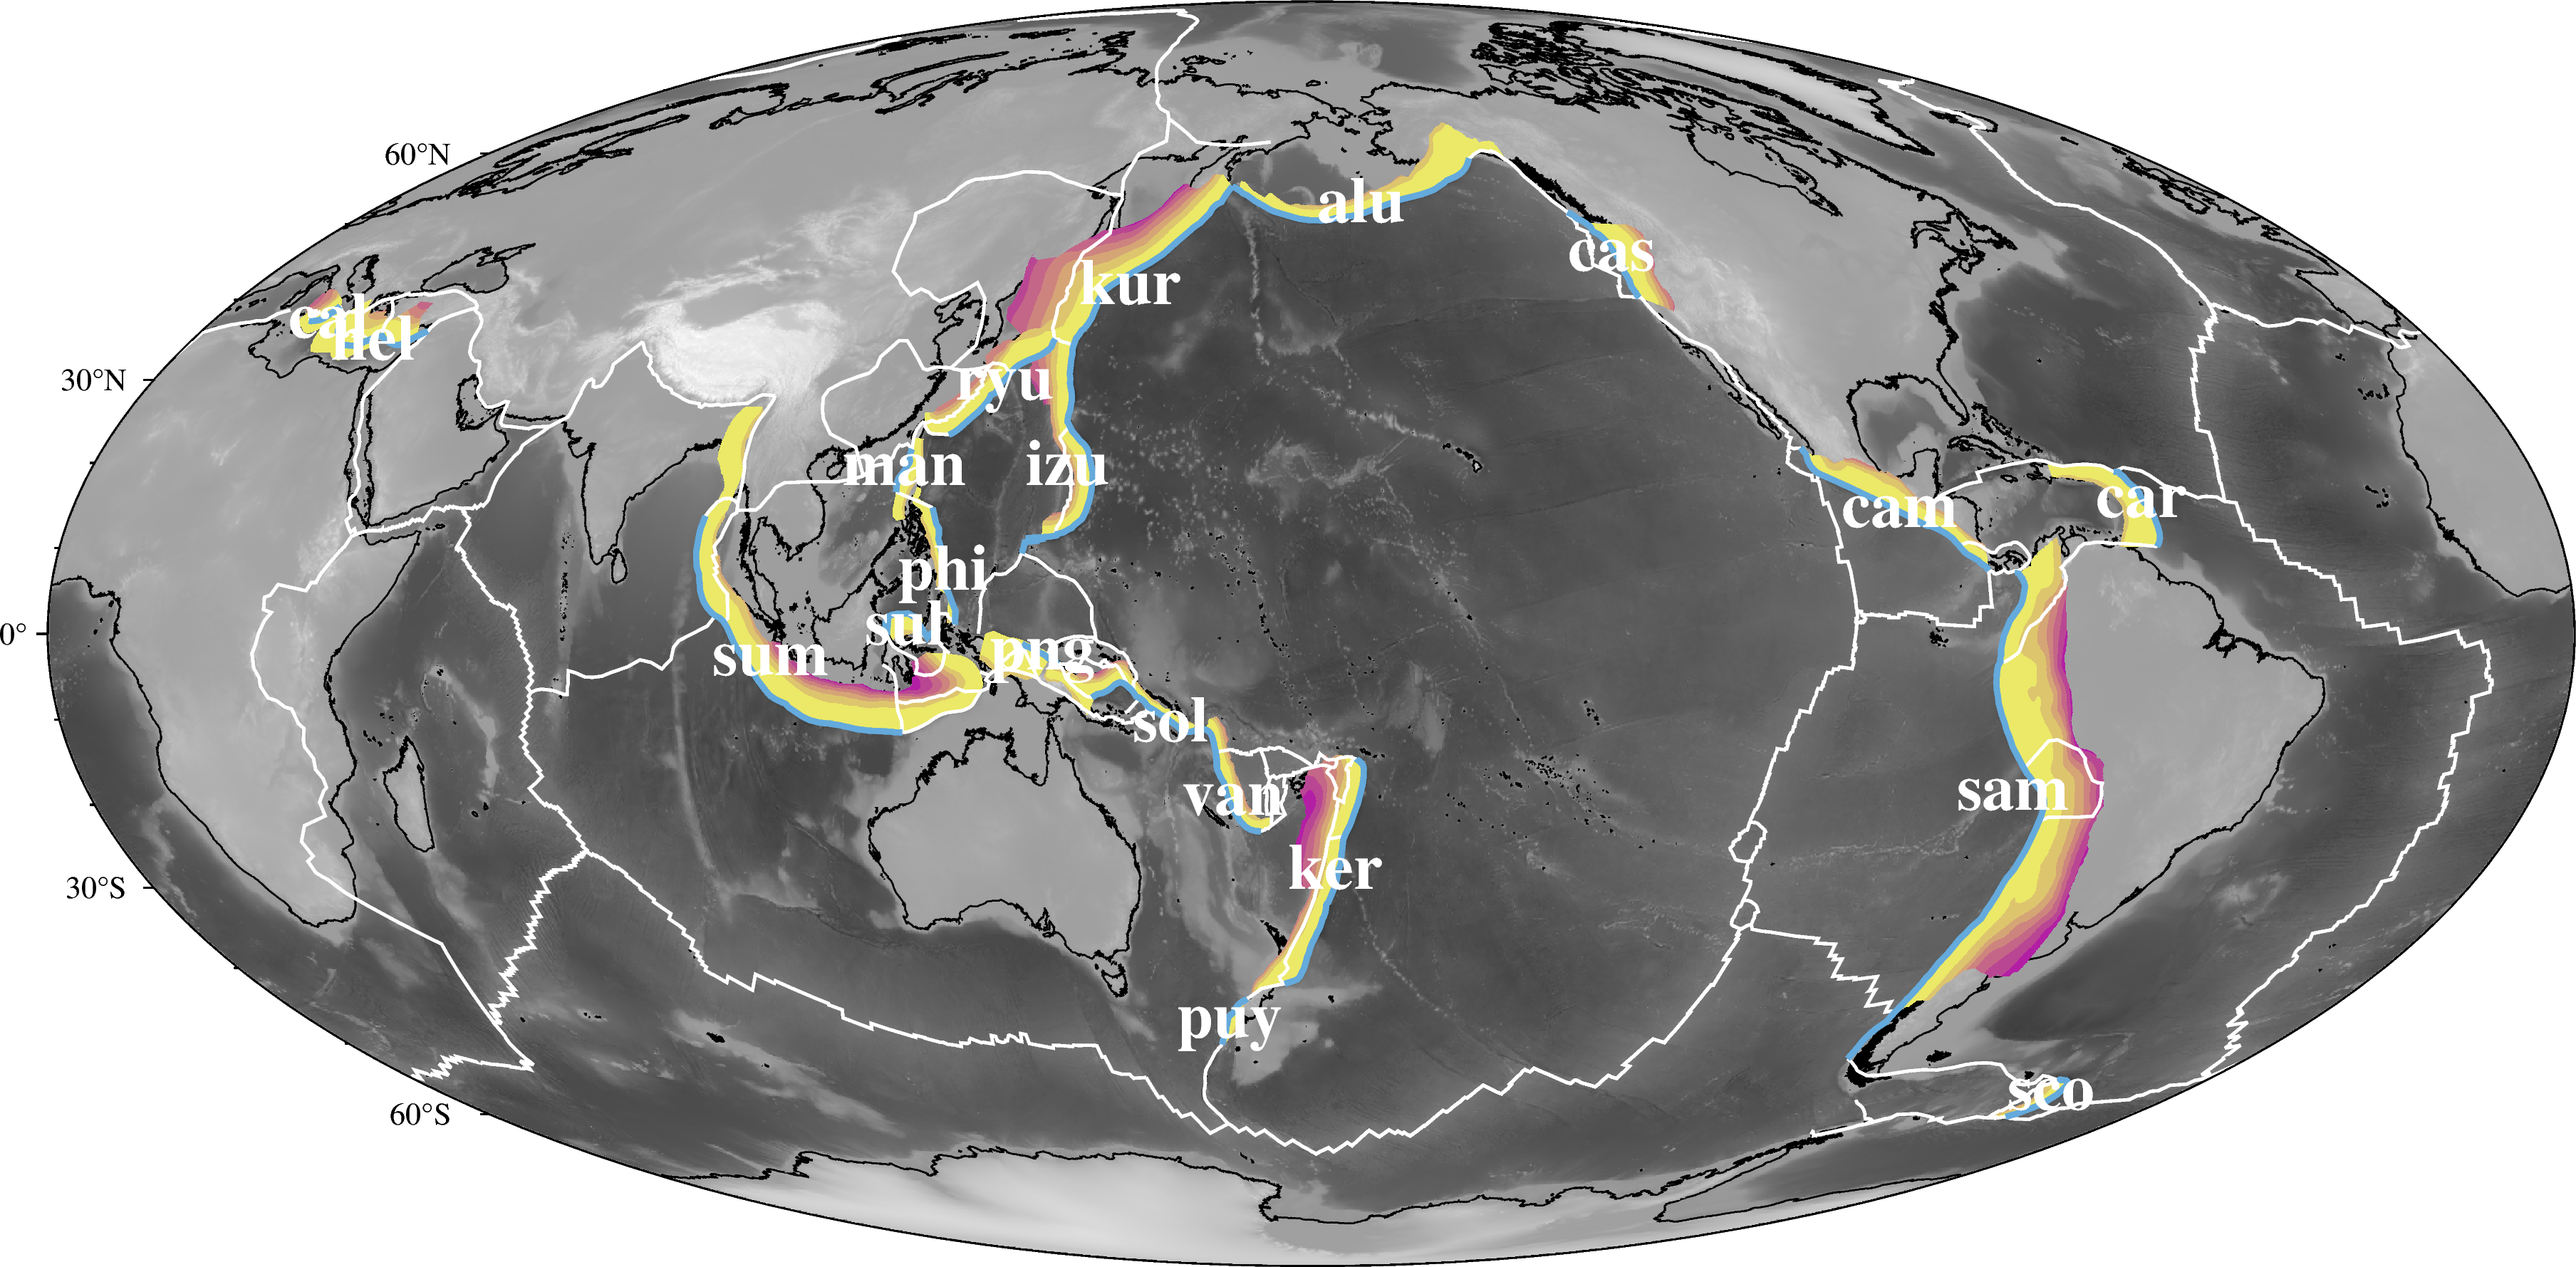

Reminder: there is something not right about the location of the plate boundaries in the Mediterranean.


In [8]:
# Create a single trench coordinate file for each Slab 2.0 slab


for n in range(len(loc)):
    loc1 = loc[n]
    trfile = loc1 + '_trench_coords.xy'
    print(n, trfile, slab2bird[loc1]['Name'])
    coordlist = []
    for i in range(len(data["features"])):
        if 'subduction' in data["features"][i]["properties"].values():
            for j in range(len(slab2bird[loc1]['Name'])):
                if slab2bird[loc1]['Name'][j] in data["features"][i]["properties"].values():
                    # Special issues with AU-PA being on two different trenches
                    if loc1 == 'puy':
                        if i != 51:
                            coordlist.extend(data["features"][i]["geometry"]["coordinates"])
                    elif loc1 == 'sol':
                        if i != 158:
                            coordlist.extend(data["features"][i]["geometry"]["coordinates"])
                    else:
                        coordlist.extend(data["features"][i]["geometry"]["coordinates"])
   
    # Save coordinates to file
    # convert to array, sort and remove duplicates
    coords_tmp = np.array(coordlist)     
    if coords_tmp.size > 0:
        p = np.where(coords_tmp[:,0]<0)  # wrap around -180/180 to 0 to 360
        coords_tmp[p,0] = 360 + coords_tmp[p,0] 
        coords_unsort = np.unique(coords_tmp, axis=0) # does not preserve order so do before sorting
        
        
        if slab2bird[loc1]['Sort'] == 1:  # longitude     
            coords = coords_unsort[coords_unsort[:,0].argsort()]
        elif slab2bird[loc1]['Sort'] == 2:  # latitude 
            coords = coords_unsort[coords_unsort[:,1].argsort()]
        else:
            coords = coords_unsort
        tmp_trenchfile = 'tempfile0'
        np.savetxt(tmp_trenchfile, coords)
        
        # 1. Calculate distances along the trenchfile
        data_list = [ ];
        with pygmt.clib.Session() as session:
            with pygmt.helpers.GMTTempFile() as tmpfile:
                session.call_module("mapproject", f"{tmp_trenchfile} -Gk ->{tmpfile.name}")
                data_str = tmpfile.read().strip()
                data_lines = data_str.split('\n')
                for i in range(len(data_lines)):
                    data_list.extend([float(value) for value in data_lines[i].split(' ')])

        tmpdata = np.array(data_list)

        # 2. Re-sample trench file at 10 km spacing
        dd = 10 # km
        n = int(tmpdata.size/3)
        data0 = tmpdata.reshape(n,3)
        tmp0 = 'tempfile0'
        np.savetxt(tmp0,data0)

        data_list = [ ];
        with pygmt.clib.Session() as session:
            with pygmt.helpers.GMTTempFile() as tmpfile1:
                session.call_module("sample1d", f"{tmp0} -Ar+d -T{dd}k -N2 -Fl ->{tmpfile1.name}")
                data_str = tmpfile1.read().strip()
                #print(data_str)
                data_lines = data_str.split('\n')
                for i in range(len(data_lines)):
                    data_list.extend([float(value) for value in data_lines[i].split(' ')])
        tmpdata = np.array(data_list)
        n = int(tmpdata.size/3)
        coord = tmpdata.reshape(n,3)
        p = np.where(coord[:,0]<0)  # wrap around -180/180 to 0 to 360
        coord[p,0] = 360 + coord[p,0] 

        # Save Coordinates to a file for re-use
        np.savetxt(trfile,coord[:,0:2],fmt='%9.4f')
            
        pen1 = '2p,100/170/220'
        fig.plot(x=coords[:,0],y=coords[:,1], pen=pen1)  
        fig.text(text = [loc1], x=coords[:,0].mean(),y=coords[:,1].mean(), font="22p,Times-Bold,white") 
        
fig.show()
print('Reminder: there is something not right about the location of the plate boundaries in the Mediterranean.')

In [9]:
fig.savefig('map_bird_slab2.png')